# Microsoft LIDA - AI Fueled Analytics Demo

### We are going to take a weather dataset from 2019-2020 and perform some exploratory data analysis with the help of LIDA. 

In [1]:
# read the dataset
import pandas as pd

df = pd.read_csv('final_dataset.csv')
df.head()

,Date,Country,City,Specie,Count,Min,Max,Median,Variance
0,2019-01-16,AE,Abu Dhabi,pm10,24,86.0,99.0,97.0,179.40
1,2019-01-22,AE,Abu Dhabi,pm10,24,51.0,57.0,55.0,23.75
2,2019-01-26,AE,Abu Dhabi,pm10,24,136.0,173.0,160.0,941.96
3,2019-01-07,AE,Abu Dhabi,pm10,24,60.0,91.0,72.0,1006.88
4,2019-01-10,AE,Abu Dhabi,pm10,24,82.0,93.0,87.0,57.97


In [31]:
df_delhi = df.loc[(df['Specie'] == 'pm25')&(df['City']=='Delhi')]
df_delhi.head(10)

,Date,Country,City,Specie,Count,Min,Max,Median,Variance
58264,2019-01-04,IN,Delhi,pm25,688,77.0,720.0,289.0,81576.30
58265,2019-02-16,IN,Delhi,pm25,719,91.0,318.0,182.0,2475.03
58266,2019-03-12,IN,Delhi,pm25,701,9.0,207.0,149.0,11851.10
58267,2019-01-14,IN,Delhi,pm25,660,59.0,999.0,169.0,70650.10
58268,2019-02-13,IN,Delhi,pm25,724,127.0,474.0,246.0,33809.90
58269,2019-03-16,IN,Delhi,pm25,682,31.0,249.0,154.0,7823.81
58270,2019-03-05,IN,Delhi,pm25,594,64.0,228.0,154.0,9161.48
58271,2019-03-21,IN,Delhi,pm25,620,61.0,470.0,177.0,47437.90
58272,2019-03-23,IN,Delhi,pm25,665,1.0,319.0,135.0,15761.70
58273,2019-01-08,IN,Delhi,pm25,686,119.0,450.0,203.0,25022.80


In [19]:
import os
from lida import Manager, TextGenerationConfig , llm  

OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')

In [20]:
lida = Manager(text_gen = llm("openai", api_key=OPENAI_API_KEY)) 

textgen_config = TextGenerationConfig(n=1, temperature=0.5, model="gpt-3.5-turbo", use_cache=True)

In [32]:
summary = lida.summarize(df_delhi, summary_method="default", textgen_config=textgen_config)  

In [33]:
goals = lida.goals(summary, n=3, textgen_config=textgen_config)

for goal in goals:
    display(goal)


### Goal 0
---
**Question:** What is the distribution of Count values in the dataset?

**Visualization:** `Bar chart of Count`

**Rationale:** By visualizing the distribution of Count values, we can understand the range and frequency of pollution levels recorded in the dataset, providing insights into the severity of air quality in the city.



### Goal 1
---
**Question:** How do the Min, Max, and Median values compare for the pollution Specie 'pm25'?

**Visualization:** `Bar chart of Min, Max, and Median for Specie 'pm25'`

**Rationale:** Comparing the Min, Max, and Median values for the 'pm25' pollution Specie can help identify the typical range of pollution levels, the highest recorded levels, and the central tendency of pollution measurements for this specific pollutant.



### Goal 2
---
**Question:** What is the variance distribution of pollution levels recorded in the dataset?

**Visualization:** `Histogram of Variance`

**Rationale:** Analyzing the variance distribution of pollution levels can provide insights into the variability and spread of pollution measurements, indicating the consistency or variability in air quality recordings over time.


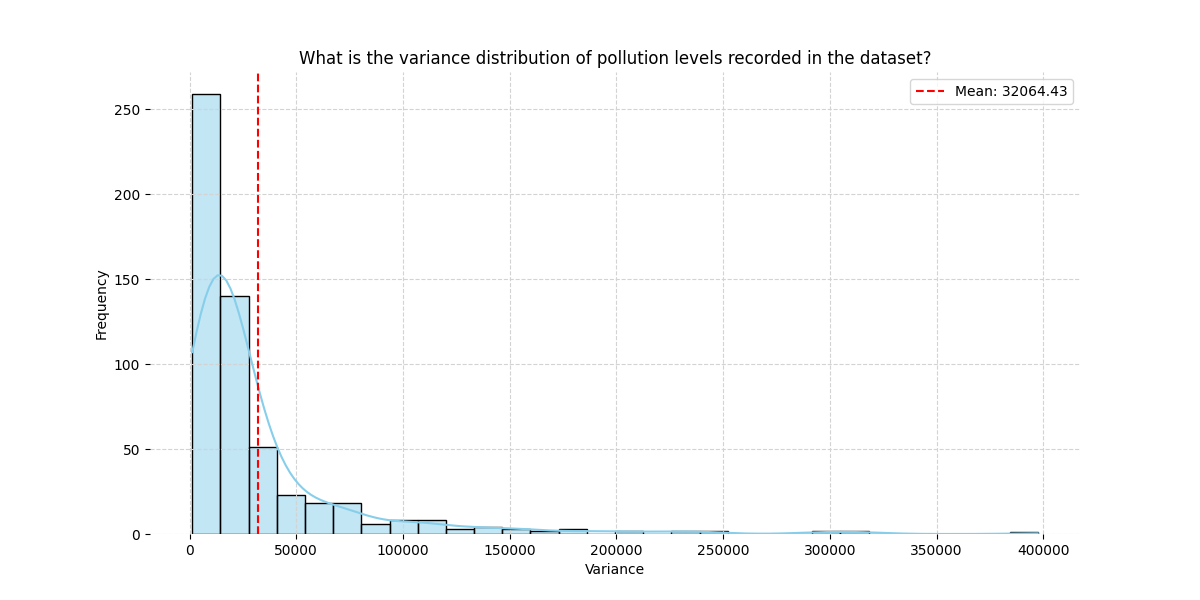

In [35]:
# Example of visualizing the second goal
i = 2
library = "seaborn"
charts = lida.visualize(summary=summary, goal=goals[i], textgen_config=textgen_config, library=library)

# Display the first chart
if charts:
    charts[0]

charts[0]